In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/content/diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

<Axes: >

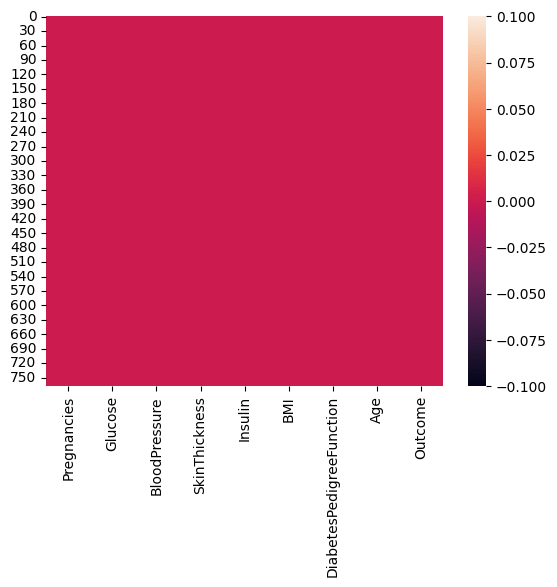

In [4]:
sns.heatmap(data.isnull())

<Axes: xlabel='Outcome', ylabel='count'>

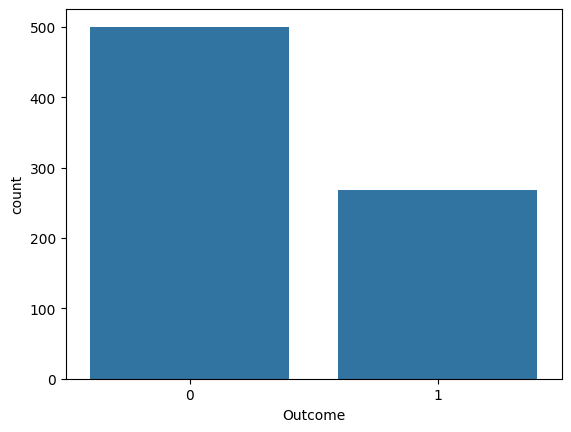

In [5]:
sns.countplot(data=data,x="Outcome")

In [6]:
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

<Axes: >

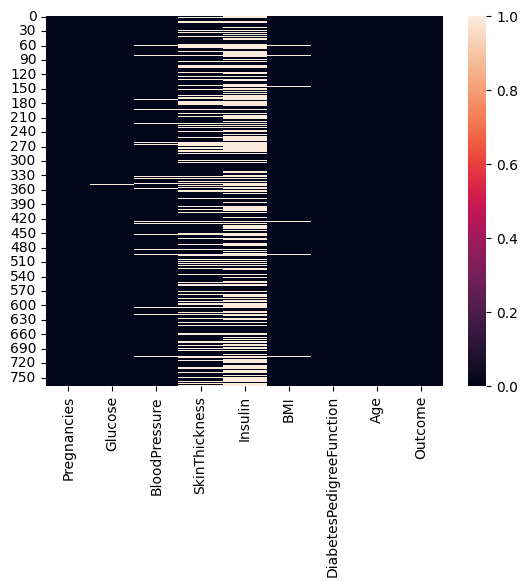

In [7]:
sns.heatmap(data.isnull())

In [8]:
data['Glucose'].fillna(data['Glucose'].mean(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].mean(),inplace=True)

<Axes: >

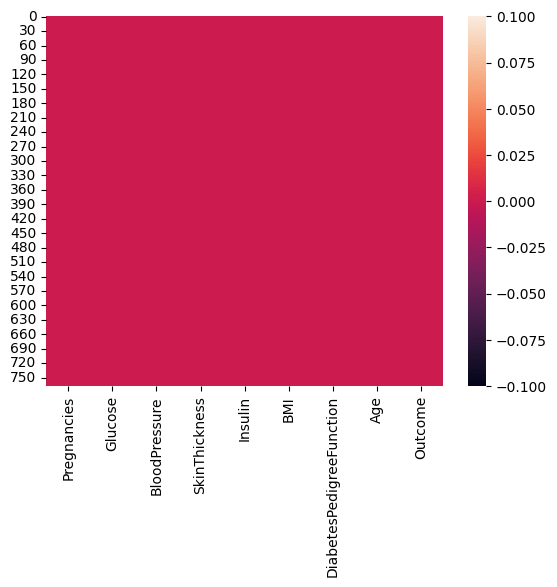

In [9]:
sns.heatmap(data.isnull())

In [10]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [11]:
data=data.drop(["Pregnancies","DiabetesPedigreeFunction","Age"],axis=1)

In [12]:
print(data)

     Glucose  BloodPressure  SkinThickness     Insulin   BMI  Outcome
0      148.0           72.0       35.00000  155.548223  33.6        1
1       85.0           66.0       29.00000  155.548223  26.6        0
2      183.0           64.0       29.15342  155.548223  23.3        1
3       89.0           66.0       23.00000   94.000000  28.1        0
4      137.0           40.0       35.00000  168.000000  43.1        1
..       ...            ...            ...         ...   ...      ...
763    101.0           76.0       48.00000  180.000000  32.9        0
764    122.0           70.0       27.00000  155.548223  36.8        0
765    121.0           72.0       23.00000  112.000000  26.2        0
766    126.0           60.0       29.15342  155.548223  30.1        1
767     93.0           70.0       31.00000  155.548223  30.4        0

[768 rows x 6 columns]


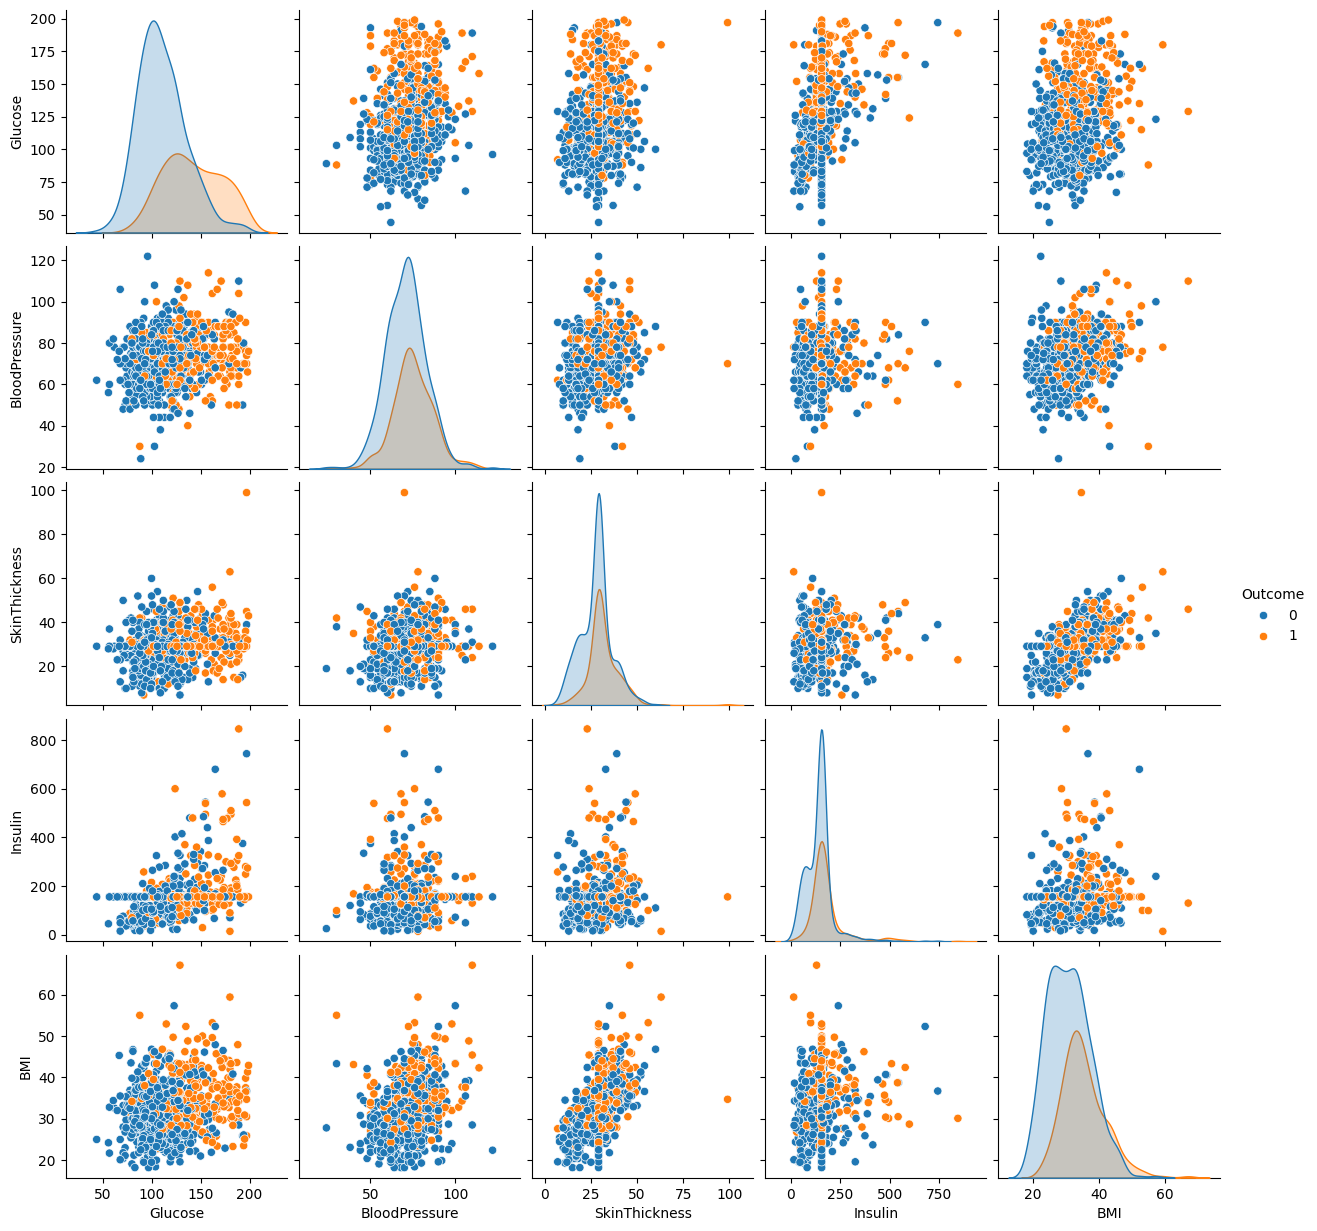

In [13]:
sns.pairplot(data,hue="Outcome")

In [14]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1]
print(x)

[[148.          72.          35.         155.54822335  33.6       ]
 [ 85.          66.          29.         155.54822335  26.6       ]
 [183.          64.          29.15341959 155.54822335  23.3       ]
 ...
 [121.          72.          23.         112.          26.2       ]
 [126.          60.          29.15341959 155.54822335  30.1       ]
 [ 93.          70.          31.         155.54822335  30.4       ]]


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [16]:
from sklearn.svm import SVC
svm_model=SVC(kernel="linear")
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [17]:
yp=svm_model.predict(x_test)

In [18]:
yp=svm_model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,yp)
print(cr)


              precision    recall  f1-score   support

           0       0.76      0.92      0.83        96
           1       0.79      0.52      0.62        58

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154



In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [20]:
yp=model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,yp)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        96
           1       0.80      0.57      0.67        58

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



In [21]:
from sklearn.neighbors import KNeighborsClassifier
modelknn=KNeighborsClassifier(n_neighbors=5)
modelknn.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
yp=modelknn.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,yp)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        96
           1       0.72      0.57      0.63        58

    accuracy                           0.75       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [23]:
from sklearn.naive_bayes import GaussianNB
modelnb=GaussianNB()
modelnb.fit(x_train,y_train)

GaussianNB()

In [24]:
yp=svm_model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,yp)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        96
           1       0.79      0.52      0.62        58

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154

